# Практическая работа №1: Формирование и первичная обработка выборки. Нахождение и точечных и интервальных оценок. Проверка статистических гипотез
Выполнил студент гр. 0373 Власюк Мирослав Вариант №3

## Цель работы
Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу. Получение практических навыков нахождения точечных статистических оценок параметров распределения, а также вычисления интервальных статистических оценок параметров распределения выборочных данных и проверки
«справедливости» статистических гипотез.

## Основные теоретические положения
Шаг:$h = \frac{R}{k}$

Размах:$R = X_{max} - X_{min}$ 

Для вычисления оптимального количества интервалов найдем  по формуле Стёрджесса : k = 1 + $\lceil 3.322 \cdots \lg{N}\rceil$ , где N - количество элементов в выборке 

Относительная частота :$p^\cdots_i = \frac{n_I}{n}$ 

среднее значение- 
Среднее выборочное: $\bar{X_в} = \frac{1}{n} \sum^n_{i+1}{x_in_i}$

Дисперсия: $\sigma^2 = \frac{\sum{x-\bar{X_в}}^2}{n}$

СКО: $S = \sqrt{\sigma^2}$

Значение с наибольшой частатой - 
Мода: $M_o = x_o + h \cdots \frac{f_{m_o} - f_{m_{o-1}}}{f_{m_o} - f_{m_{o-1}} + f_{m_o} - f_{m_{o+1}}}$, $x_0$ - начало модального ряда, h - шаг, $f_{m_o}$ - частота модального ряда $f_{m_{o-1}}$ - частота интервала, предшествующего модальному $f_{m_{o+1}}$ - частота интервала, следующего за модальным

медиана: $M_e = x_e + h \cdots \frac{\sum{\frac{f_{m_o}}{2}} - S_{m_{e-1}}}{f_{m_e}}$

коэффициент вариации: $V = \frac{S}{\bar{x}} \cdots 100%$

Условныые варианты ${u_i = \frac{x_i - C}{h}}$

Обычный эмпирический момент $M^\cdots_k = \frac{\sum{n_i(x_i-C)^k}}{n}$

Условный эмпирический момент $\frac{\sum{n_i\cdot su_i^k}}{n}$

Центральный эмпирический момен $M_k = \frac{\sum{n_i(x_i-\bar{X_в})^k}}{n}$

коэффициент ассиметрии = $A = \frac{\mu_3}{\S^3}$

коэффициент эксцесса = $E = \frac{\mu_4}{\S^4}$

Исправленная дисперсия $S^2 = \frac{n}{n-1}\cdots S^2_в$

Доверительный интервал для математического ожидания
при заданном объёме выборки: $x_{в} -\frac{t_{\gamma}\sigma _{в}}{\sqrt{n}} ; x_{в} + \frac{t_{\gamma}\sigma _{в}}{\sqrt{n}}$ 

доверительный интервал для СКО $S(1-q) < \sigma < S(1+q)$ , где S это исправленное СКО, а q табулированное значение 

Выравнивающие частоты - $n^{'}_i = nP_i$

Наблюдаемое :$\sum{\frac{(n_i-n^{'}_i)^2}{n^{'}_i}}$

Критическое это табличное значение ХИквадрат с k - r - 1 степенями свободы (r -количество параметров в распределении)



## Постановка задачи
Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Для заданных выборочных данных вычислить с использованием метода моментов и условных вариант точечные статистические оценки математического ожидания, дисперсии, среднеквадратичного отклонения, асимметрии, эксцесса, моды, медианы и коэффициента вариации исследуемой случайной величины. Для заданной надёжности определить границы доверительных интервалов для математического ожидания и среднеквадратичного отклонения случайной величины. Проверить гипотезу о нормальном распределении исследуемой случайной величины с помощью критерия Пирсона 𝜒2. 
Полученные результаты содержательно проинтерпретировать

## Выполнение работы


In [1]:
import csv
import pandas as pd
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def sort_array(arr):
        
    for i in range(len(arr)):
        cursor = arr[i]
        pos = i
        
        while pos > 0 and arr[pos - 1] > cursor:
            arr[pos] = arr[pos - 1]
            pos = pos - 1
        arr[pos] = cursor

    return arr

def between(lst, a, b):
    count = 0
    for i in lst: 
        if a-1 <= i <= b+1:
            count += 1
    return count 

def sum_values(arr):
    count = 0
    for i in arr:
            count += i
    return count

        

def func_laplass(num):
    return (scipy.stats.norm.cdf(num) - 1/2)
   # return  (1)/(np.sqrt(2 * np.pi)) * integrate.quad (np.exp(-(pow(num, 2))/(2)), 0

### Пункт 1: Из генеральной совокупности Men_Shoes были выбраны столбцы How_Many_Sold и Current_Price, из них  сформирована репрезентативная выборка, механичиским способом.

### Пункт 2: преобразовать выборку  в ранжированный, вариационный, интервальный ряд

In [3]:
with open("./vMiro.csv", encoding='utf-8') as r_file:
     file_reader = csv.reader(r_file, delimiter = ",")
df = pd.read_csv("./vMiro.csv", header=None)
#asdj = [[320, 340, 340, 352, 371, 377, 379, 382, 382, 383, 391, 394, 394, 397, 397, 398, 399, 401, 403, 404, 405, 407, 408, 409, 412, 413, 413, 414, 415, 416, 417, 418, 419, 421, 421, 421, 421, 422, 422, 423, 423, 432, 433, 433, 434, 436, 436, 437, 438, 438, 438, 439, 440, 442, 442, 446, 447, 448, 448, 449, 452, 457, 457, 458, 458, 462, 463, 463, 464, 465, 466, 468, 468, 469, 472, 473, 475, 477, 477, 480, 480, 481, 482, 482, 482, 483, 484, 487, 490, 492, 493, 496, 497, 498, 498, 499, 500, 500, 503, 504, 505, 506, 507, 510, 513, 517, 518, 521, 522, 522, 523, 525, 525, 525, 545, 566]]
#df = pd.DataFrame(asdj)
#df = df.transpose()
df.pop(1)
totalElem=len(df[0])
print(df)
#Из генеральной совокупности была сформирована репрезентативная выборка, механичиским способом.


       0
0    309
1   6159
2    392
3    317
4    954
..   ...
86    49
87    83
88     2
89   309
90  6159

[91 rows x 1 columns]


In [4]:
df = df.sort_values(0) #ранжированный
array_ran = df.transpose().to_numpy()
print('Ранжированный ряд:\n', np.array(df[0]))

Ранжированный ряд:
 [    2     2     2     2     7     7     7    12    12    49    60    63
    83    83    83    84   102   102   102   112   112   116   116   135
   146   173   173   206   206   216   240   240   240   240   240   240
   245   277   277   307   307   307   309   309   309   317   350   392
   392   557   557   682   812   843   843   860   954   954  1060  1060
  1072  1072  1685  1685  1795  2144  2144  2144  2144  2242  2242  3448
  3448  3448  4583  4583  4583  4583  4583  4992  4992  5690  6159  6159
  6159  7712  7712 16662 18747 18747 38839]


In [5]:
dup = df.groupby(df.columns.tolist(),as_index=False).size() #вариационный
print('Вариационный ряд:\n',dup)

Вариационный ряд:
         0  size
0       2     4
1       7     3
2      12     2
3      49     1
4      60     1
5      63     1
6      83     3
7      84     1
8     102     3
9     112     2
10    116     2
11    135     1
12    146     1
13    173     2
14    206     2
15    216     1
16    240     6
17    245     1
18    277     2
19    307     3
20    309     3
21    317     1
22    350     1
23    392     2
24    557     2
25    682     1
26    812     1
27    843     2
28    860     1
29    954     2
30   1060     2
31   1072     2
32   1685     2
33   1795     1
34   2144     4
35   2242     2
36   3448     3
37   4583     5
38   4992     2
39   5690     1
40   6159     3
41   7712     2
42  16662     1
43  18747     2
44  38839     1


In [6]:
array_varr = dup.transpose().to_numpy()
razmax = array_varr[0][len(array_varr[0]) - 1] - array_varr[0][0] #1. найти размах вариации
k = 1 + round(np.log2(len(df)))
h = razmax/k # найти шаг интервального ряда h
a_0 = array_ran[0][0]
i = 0
quantity_interval = int((array_varr[0][len(array_varr[0]) - 1] - array_varr[0][0]) / h) #количество интервалов
interval_arr = np.empty((quantity_interval,3))
for i in range(quantity_interval):
    for j in range(2):
        interval_arr[i][j] = a_0 + j * h
    #print(f'i = {i} | arr[i][0] = {arr[i][0]} | arr[i][1] = {arr[i][1]} | a_0 = {a_0}')
    a_0 = interval_arr[i][1]
    interval_arr[i][2] = between(array_ran[0], interval_arr[i][0], (interval_arr[i][1] + 0.1))
    #if ()
   # if (interval_arr[i][1]) == array_ran[0][len(array_ran[0]) - 1]:
       # interval_arr[i][1] = array_ran[0][len(array_ran[0]) - 1]
       # break;
result_inter_df = round(pd.DataFrame(interval_arr, columns=['xᵢ₋₁', 'xᵢ','nᵢ']),2)
result_inter_df.index += 1
print('Интервальный ряд:\n',result_inter_df)

Интервальный ряд:
        xᵢ₋₁        xᵢ    nᵢ
1      2.00   4856.62  79.0
2   4856.62   9711.25   8.0
3   9711.25  14565.88   0.0
4  14565.88  19420.50   3.0
5  19420.50  24275.12   0.0
6  24275.12  29129.75   0.0
7  29129.75  33984.38   0.0
8  33984.38  38839.00   1.0


### Пункт 3 Для интервального ряда абсолютных частот построить полигон, гистограмму и отобразить  эмпирическую функицю

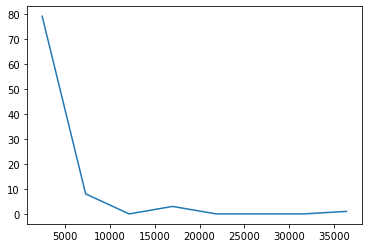

In [9]:
result_five_df = copy.copy(result_inter_df) # копирования интервального ряда
mid_interval = np.empty(quantity_interval)  #среднее значение интервалов
accum_abs_freq = np.empty(quantity_interval) #накопительные абсолютные часоты
frequen = 0   #накопительная "переменная" для абсолютных частот
accum_abs_pro = np.empty(quantity_interval) #накопительные относительная частоты
freq_probality = 0  #накопительная "переменная"
result_five_df.insert(3,'p⃰ᵢ', (result_five_df['nᵢ'] / totalElem))   #относительная частота 
for i in range(quantity_interval):
    frequen += result_five_df['nᵢ'][i + 1]   #сумма предыдущих
    accum_abs_freq[i] = frequen  # присваивания
    freq_probality += result_five_df['p⃰ᵢ'][i + 1]
    accum_abs_pro[i] = freq_probality
    mid_interval[i] = interval_arr[i][0] + (interval_arr[i][1] - interval_arr[i][0]) / 2  #не знаю зачем ты так сделал, но сумма первого + разность второго и первого деленая на 2
    
plt.plot(mid_interval, result_inter_df['nᵢ'])

(array([79.,  8.,  0.,  3.,  0.,  0.,  0.,  1.]),
 array([2.00000000e+00, 4.24979750e+03, 8.49759500e+03, 1.27453925e+04,
        1.69931900e+04, 2.12409875e+04, 2.54887850e+04, 2.97365825e+04,
        3.39843800e+04]),
 <BarContainer object of 8 artists>)

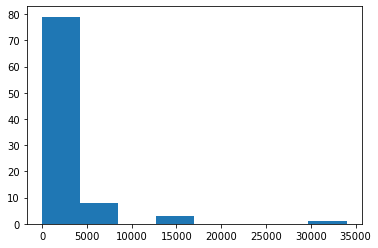

In [10]:
plt.hist(result_inter_df['xᵢ₋₁'], quantity_interval, weights=result_inter_df['nᵢ'])

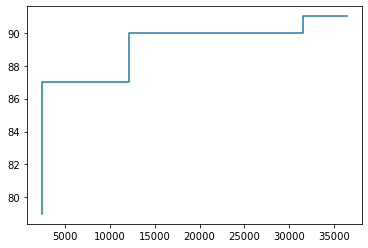

In [11]:
plt.step(mid_interval, accum_abs_freq)

#### Вывод
По графикам   видно распределение выборки, исходя из графиков   можно сказать, что у нас есть явные "выбросы" так как >95% значений выборки находятся в первом интервале. 

### Пункт 4 Аналогично 3 пункту, но для относительных частота

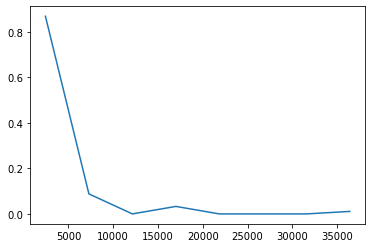

In [12]:
plt.plot(mid_interval, result_five_df['p⃰ᵢ'])

(array([0.86813187, 0.08791209, 0.        , 0.03296703, 0.        ,
        0.        , 0.        , 0.01098901]),
 array([2.00000000e+00, 4.24979750e+03, 8.49759500e+03, 1.27453925e+04,
        1.69931900e+04, 2.12409875e+04, 2.54887850e+04, 2.97365825e+04,
        3.39843800e+04]),
 <BarContainer object of 8 artists>)

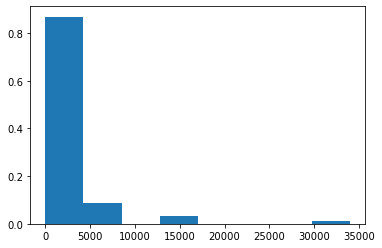

In [13]:
plt.hist(result_inter_df['xᵢ₋₁'], quantity_interval, weights=result_five_df['p⃰ᵢ'])

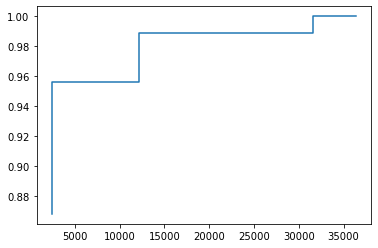

In [14]:
plt.step(mid_interval, accum_abs_pro)

#### Вывод
Графики для относительных частот визуально совпадают  с графиками для абсолютных частот 

### Пункт 5 Для интервального ряда найти середины интервалов, накопительные частоты, результаты предстаить  в виде таблицы

In [15]:
result_five_df.insert(2,'x~ᵢ',mid_interval) # добавление в дф
result_five_df.insert(5,'∑nᵢ',accum_abs_freq)
result_five_df.insert(6,'∑p⃰ᵢ', accum_abs_pro)
sum_df = pd.DataFrame({'xᵢ₋₁' : [' '],
                       'xᵢ'   : [' '],
                       'x~ᵢ'  : [' '],
                       'nᵢ'   : [sum_values(result_five_df['nᵢ'])],
                       'p⃰ᵢ'  : [sum_values(result_five_df['p⃰ᵢ'])],
                       '∑nᵢ'  : ['-  '],
                       '∑p⃰ᵢ' : ['-  ']})
sum_df.index=['∑']
result_five_df = round(pd.concat([result_five_df, sum_df], axis=0, ignore_index=False), 2) # объединение дфов
print(result_five_df)

       xᵢ₋₁        xᵢ         x~ᵢ    nᵢ   p⃰ᵢ   ∑nᵢ      ∑p⃰ᵢ
1       2.0   4856.62   2429.3125  79.0  0.87  79.0  0.868132
2   4856.62   9711.25   7283.9375   8.0  0.09  87.0  0.956044
3   9711.25  14565.88  12138.5625   0.0  0.00  87.0  0.956044
4  14565.88   19420.5  16993.1875   3.0  0.03  90.0  0.989011
5   19420.5  24275.12  21847.8125   0.0  0.00  90.0  0.989011
6  24275.12  29129.75  26702.4375   0.0  0.00  90.0  0.989011
7  29129.75  33984.38  31557.0625   0.0  0.00  90.0  0.989011
8  33984.38   38839.0  36411.6875   1.0  0.01  91.0       1.0
∑                                  91.0  1.00   -         -  


### Пункт 6 получить варианты, используя условные варианты

In [22]:
result_six_df  = copy.copy(result_inter_df)
conditional_option = np.empty(quantity_interval)
fake_null = 0
fake_null_id = 0
if (quantity_interval % 2) == 0 :#поиск ложного нуля, если нечетные, берем серединные интервал, если четные берем интервалы по середине
    if (result_six_df['nᵢ'][quantity_interval/2] == result_six_df['nᵢ'][quantity_interval/2 + 1]): # если интервалы равны, берем тот, который раньше
        fake_null = mid_interval[int(quantity_interval/2)]
        fake_null_id = int(quantity_interval/2)
    else:
        if (result_six_df['nᵢ'][quantity_interval/2] > result_six_df['nᵢ'][quantity_interval/2 + 1]): # если не равны, берем наименьший(по среднему значнеие в интервале) из них
            fake_null = mid_interval[int(quantity_interval/2 - 1)]
            fake_null_id = int(quantity_interval/2 - 1)
        else:
            fake_null = mid_interval[int(quantity_interval/2 )]
            fake_null_id = int(quantity_interval/2)
else:
    fake_null = mid_interval[int(quantity_interval/2)] # mid_interval индексируется с нуля
    fake_null_id = int(quantity_interval/2)
for i in range(quantity_interval):
    conditional_option[i] = (mid_interval[i] - fake_null) / h   #поиск условных вариант 
    #print(f' i: {i}, midI = {mid_interval[i]}, fake_null = {fake_null}, h = {h}')
    
multiplex = np.empty((5, quantity_interval))
for i in range(4): #поиск произведения условных вариант и частот 1 2 3 4 порядка
    for j in range(quantity_interval):
        multiplex[i][j] = result_six_df['nᵢ'][j + 1] * np.power(conditional_option[j], i+ 1)
        #print(f'i={i} j={j} result_six_df={result_six_df["n_i"][j + 1]} conditional_option={conditional_option[j]}')
result_six_df.insert(3,'u_i',conditional_option)

for i in range(0, 4): # добавление в df столбцов с произведением 
    result_six_df.insert(i + 4,f'nᵢ*u^{i+1}_i',multiplex[i])
    
for j in range(quantity_interval): # поиск последнего произведение услвного варианта и частоты 
        multiplex[4][j] = result_six_df['nᵢ'][j + 1] * np.power((conditional_option[j] + 1),4)
result_six_df.insert(8,'nᵢ*(u_i+1)^4',multiplex[4]) # его добавление 
sum_df = pd.DataFrame({'xᵢ₋₁' : [' '],
                       'xᵢ'   : [' '],
                       'nᵢ'   : [sum_values(result_six_df['nᵢ'])],
                       'nᵢ*u^1_i'   : [sum_values(result_six_df['nᵢ*u^1_i'])],
                       'nᵢ*u^2_i'   : [sum_values(result_six_df['nᵢ*u^2_i'])],
                       'nᵢ*u^3_i'   : [sum_values(result_six_df['nᵢ*u^3_i'])],
                       'nᵢ*u^4_i'   : [sum_values(result_six_df['nᵢ*u^4_i'])],
                       'nᵢ*(u_i+1)^4'   : [sum_values(result_six_df['nᵢ*(u_i+1)^4'])]
                      })
sum_df.index=['∑']
result_six_df = round(pd.concat([result_six_df, sum_df], axis=0, ignore_index=False), 2)
print(result_six_df)
#контроль
if (int(4*sum_df['nᵢ*u^1_i'] + 6*sum_df['nᵢ*u^2_i'] + 4*sum_df['nᵢ*u^3_i'] + sum_df['nᵢ*u^4_i']) + totalElem) == int(sum_df['nᵢ*(u_i+1)^4']):
    print('\nControl passed')
else:
    print('\nControl failed')

16993.1875
       xᵢ₋₁        xᵢ    nᵢ  u_i  nᵢ*u^1_i  nᵢ*u^2_i  nᵢ*u^3_i  nᵢ*u^4_i  \
1       2.0   4856.62  79.0 -3.0    -237.0     711.0   -2133.0    6399.0   
2   4856.62   9711.25   8.0 -2.0     -16.0      32.0     -64.0     128.0   
3   9711.25  14565.88   0.0 -1.0      -0.0       0.0      -0.0       0.0   
4  14565.88   19420.5   3.0  0.0       0.0       0.0       0.0       0.0   
5   19420.5  24275.12   0.0  1.0       0.0       0.0       0.0       0.0   
6  24275.12  29129.75   0.0  2.0       0.0       0.0       0.0       0.0   
7  29129.75  33984.38   0.0  3.0       0.0       0.0       0.0       0.0   
8  33984.38   38839.0   1.0  4.0       4.0      16.0      64.0     256.0   
∑                      91.0  NaN    -249.0     759.0   -2133.0    6783.0   

   nᵢ*(u_i+1)^4  
1        1264.0  
2           8.0  
3           0.0  
4           3.0  
5           0.0  
6           0.0  
7           0.0  
8         625.0  
∑        1900.0  

Control passed


In [23]:
fake_null_id

3

### Пункт 7 Вычислить условные эмпирические моменты и центральные эмпирические моменты

In [17]:
conditional_emp_moment = copy.copy(multiplex)
centered_emp_moment = np.empty((1, 4))
sum_cond_emp = np.empty((1, 4))
for i in range(4): # тут тоже все по формулкам (взял и пред.пункта по формулкам)
    sum_cond_emp[0][i] = sum_values(conditional_emp_moment[i])
sum_cond_emp /= totalElem # для центральных эмпирических все по формулкам
centered_emp_moment[0][0] = 0 
centered_emp_moment[0][1] = (sum_cond_emp[0][1] - pow(sum_cond_emp[0][0], 2)) * pow(h,2)
centered_emp_moment[0][2] = (sum_cond_emp[0][2] - 3 * sum_cond_emp[0][0] * sum_cond_emp[0][1] + 2 * pow(sum_cond_emp[0][1], 3)) * pow(h, 3)
centered_emp_moment[0][3] = (sum_cond_emp[0][3] - 4 * sum_cond_emp[0][2] * sum_cond_emp[0][0] + 6 * sum_cond_emp[0][1] * pow(sum_cond_emp[0][0], 2) - 3 * pow(sum_cond_emp[0][0], 4)) * pow(h, 4)
print(centered_emp_moment)
#print(f'i={i} j={j} result_six_df={result_six_df["n_i"][j + 1]} conditional_option={conditional_option[j]}')

result_seven_df = pd.DataFrame(index=range(1, 5))
result_seven_df['vᵢ*'] = sum_cond_emp[0]
result_seven_df['μᵢ*'] = centered_emp_moment[0]
print(result_seven_df)

[[0.00000000e+00 2.01152360e+07 1.37921062e+14 1.36108779e+16]]
         vᵢ*           μᵢ*
1  -2.736264  0.000000e+00
2   8.340659  2.011524e+07
3 -23.439560  1.379211e+14
4  74.538462  1.361088e+16


### Пункт 8 Вычислить выборочное среднее и дисперсию с помощью стандартной формулы  и  условных вариант

In [18]:
x_vibor_std = 0
for i in range(quantity_interval):  # сумма средних умноженная на частоту 
    x_vibor_std += mid_interval[i] * result_five_df['nᵢ'][i + 1]
x_vibor_std /= totalElem # делить на количество элементы 

dispercia_std = 0
for i in range(quantity_interval):
    dispercia_std += ( pow(mid_interval[i] - x_vibor_std, 2) ) * result_five_df['nᵢ'][i + 1] # (средние минус х_выборочное) в квадрате умножить на частоту
dispercia_std /= totalElem # поделить на количество элементы

x_vibor = sum_cond_emp[0][0] * h + fake_null  
dispercia = (sum_cond_emp[0][1] - pow(sum_cond_emp[0][0], 2)) * pow(h, 2)

print(f'Результаты выборочного среднего совпадают {x_vibor_std} и {x_vibor}')
print(f'Результаты дисперсии совпадают {dispercia_std} и {dispercia}')

Результаты выборочного среднего совпадают 3709.6531593406594 и 3709.65315934066
Результаты дисперсии совпадают 20115236.002769895 и 20115236.002769895


#### Вывод: 
результаты примерно равны

### Пункт 9 Вычислить исправленную выборочную дисперсию и СКО\ сравнить оценки с смещенными оценками 

In [19]:
sko = np.sqrt(dispercia)
disp_isp = dispercia * totalElem / (totalElem - 1)
sko_isp = np.sqrt(disp_isp)
print(f'Исправленная дисперсия ={disp_isp}, Исправленное СКО ={sko_isp}')
print(f'Дисперсия: {dispercia} и sko:{sko}')

Исправленная дисперсия =20338738.625022892, Исправленное СКО =4509.84906898478
Дисперсия: 20115236.002769895 и sko:4485.0012266185495



Можем заметить незначительные различия

### Пункт 10 Вычислить статистическую оценку коэффициентов ассимитрии  и эксцесса

In [20]:
assimetr = centered_emp_moment[0][2] / pow(sko, 3)
ecsecc = centered_emp_moment[0][3] / pow(sko, 4) - 3
print(f'Ассиметрия:{assimetr}, эксцесс:{ecsecc}')

Ассиметрия:1528.7726104581445, эксцесс:30.638441941152855


#### Вывод
так как симметрия положительная, значит у нас отклонения распределения в сторону положительных значений
Так как эксцесс положительный то распределение островершинное

### Пункт 11 Вычислить Моду, медиану и коэффициент вариаций

In [ ]:
moda = 0
max_n = -1
max_id = 1
for i in range(quantity_interval):  # подсчет модального интервала
    if result_five_df['nᵢ'][i+1] > max_n:
        max_n = result_five_df['nᵢ'][i+1]
        max_id = i + 1
if (max_id == 1) or (max_id == quantity_interval): # если модальный интервал первый или последний
    if(max_id == 1): # если первый то предыдущий мод.инт = 0
        pred_moda = 0
        next_moda = result_five_df['nᵢ'][max_id + 1]
    else:
        next_moda = 0 # если последний то следующий 0
        pred_moda = result_five_df['nᵢ'][max_id - 1]
else: #если не первый и не последний 
    next_moda = result_five_df['nᵢ'][max_id + 1]
    pred_moda = result_five_df['nᵢ'][max_id - 1]
#формула для моды
moda = result_five_df['xᵢ₋₁'][max_id] + h * (result_five_df['nᵢ'][max_id] - pred_moda)/((result_five_df['nᵢ'][max_id] - pred_moda) + (result_five_df['nᵢ'][max_id] - next_moda))   

median = 0

id_median = 0
accum_abs_freq_pred = 0
for i in range(len(accum_abs_freq)):
    if accum_abs_freq[i] > int(totalElem / 2): # поиск медианы
        id_median = i
        break;
if (id_median > 0):
    accum_abs_freq_pred = result_five_df['∑nᵢ'][id_median]
median = result_five_df['xᵢ₋₁'][id_median + 1] + h * (0.5*totalElem - accum_abs_freq_pred)/(result_five_df['∑nᵢ'][id_median + 1])
# формулка для медианы
koeff_var = (sko / x_vibor) * 100
#формулка
print(f'Мода:{moda}, медиана:{median}, коэффициент вариаций:{koeff_var}')

#### Вывод
Исходя из моды, можно сделать вывод, что часто встреющий интервал со средним значением 2882 (1 интервал)

Так как коэфициент вариаций > 100% из этого можно сделать что сильна вариация признаков по отношению к средней величине

### Пункт 12 Вычислить точность и доверительный интервал мат.ожидания

In [ ]:
tab1 = 1.987
tab2 = 2.633
dov_int = np.empty((2,2))
dov_int[0][0] = (x_vibor - tab1*sko_isp/np.sqrt(totalElem))
dov_int[0][1] = (x_vibor + tab1*sko_isp/np.sqrt(totalElem))
dov_int[1][0] = (x_vibor - tab2*sko_isp/np.sqrt(totalElem))
dov_int[1][1] = (x_vibor + tab2*sko_isp/np.sqrt(totalElem))
print(f'доверительные интервал для 0.95:{dov_int[0]}\nдоверительный интервал для 0.99:{dov_int[1]}')
print(f'точность для 0.95:{tab1*sko_isp/np.sqrt(totalElem)} точность для 0.99:{tab2*sko_isp/np.sqrt(totalElem)}')

#### Вывод
Выборочно среднее попадает в оба доверительных интервала 

### Пункт 13 Построить доверительные интервалы

In [ ]:
tab1 = 0.151
tab2 = 0.211
dov_int[0][0] = sko_isp*(1- tab1)
dov_int[0][1] = sko_isp*(1+ tab1)
dov_int[1][0] = sko_isp*(1- tab2)
dov_int[1][1] = sko_isp*(1+ tab2)
print(f'доверительные интервал для 0.95:{dov_int[0]}\nдоверительный интервал для 0.99:{dov_int[1]}')

#### Вывод
СКО попадает в оба доверительных интервала 

### Пункт 14 Проверить гипотезу о норм. зад. распр.с помощью square(ХИ)

In [ ]:
df = quantity_interval - 3
result_fourteen_df  = copy.copy(result_inter_df)
result_fourteen_df['xᵢ₋₁'][1] = -np.inf
result_fourteen_df['xᵢ'][quantity_interval] = np.inf
teor_frequence = np.empty((1, quantity_interval)) 
theor_prob = np.empty((1, quantity_interval))
for i in range(quantity_interval): #
    theor_prob[0][i] = -func_laplass( (result_fourteen_df['xᵢ₋₁'][i + 1] - x_vibor)/(sko) ) + func_laplass( (result_fourteen_df['xᵢ'][i + 1] - x_vibor)/(sko) )
result_fourteen_df.insert(3, "pᵢ",theor_prob[0])
teor_frequence[0] = theor_prob[0] * totalElem
intermediate_array = np.empty((1, quantity_interval))
for i in range(quantity_interval):
    intermediate_array[0][i] = pow((result_fourteen_df['nᵢ'][i + 1] - teor_frequence[0][i]), 2)
result_fourteen_df.insert(4, "n'ᵢ", teor_frequence[0])
result_fourteen_df.insert(5, "(nᵢ-n'ᵢ)²", intermediate_array[0])
result_fourteen_df.insert(6, "(nᵢ-n'ᵢ)²/n'ᵢ", intermediate_array[0] / teor_frequence[0] )
result_fourteen_df.insert(7, "n²ᵢ", pow(result_fourteen_df['nᵢ'], 2))
result_fourteen_df.insert(8, "n²ᵢ/n'ᵢ", result_fourteen_df['n²ᵢ']/teor_frequence[0])


sum_df = pd.DataFrame({'xᵢ₋₁' : [' '],
                       'xᵢ'   : [' '],
                       'pᵢ'    : [sum_values(result_fourteen_df['pᵢ'])],
                       'nᵢ'   : [sum_values(result_fourteen_df['nᵢ'])],
                       "n'ᵢ"   : [sum_values(result_fourteen_df["n'ᵢ"])],
                       "(nᵢ-n'ᵢ)²/n'ᵢ"   : [sum_values(result_fourteen_df["(nᵢ-n'ᵢ)²/n'ᵢ"])],
                       "n²ᵢ/n'ᵢ"   : [sum_values(result_fourteen_df["n²ᵢ/n'ᵢ"])],
                      })
sum_df.index=['∑']
result_fourteen_df = round(pd.concat([result_fourteen_df, sum_df], axis=0, ignore_index=False), 2)

x_krit = 9.48773 #вот тут число это значение из таблицы (X^2 и степени свободы) в моем случае df = n - r - 1 r(чсло параметров) то есть   7 - 3 X(4, 0.05)
x_nabl = int(sum_df[ "(nᵢ-n'ᵢ)²/n'ᵢ"])
print(f'наблюдаемое {x_nabl} критическое {x_krit}')
if (x_nabl < x_krit):
    print('theory access')
else:
    print('theory fail')

print(result_fourteen_df)


#### Вывод
Проверка корректности $\chi^2_{набл}$, была пройдета, так как значения сумм совпадают
Так как наблюдаемое значения критерия больше критического, значит гипотезу о нормальном распределении отвергаем. 

## Выводы
В ходе практической работы была сформированна выборка из генеральной совокупности
На её основе осуществленна первичная обработка, а именно преобразование выборки в ранжированный, вариационный и интервальынй ряд

Для интервального ряда построены графический полигон, гистограмма, эмпирическая функция

Найдены середины интервалов и накопленные часоты

Вычислены условные варианты, эмпирический моменты через условные варианты и центральный эмпирические моменты

Вычисленны выборочные среднее и дисперсия, исправленная выборочная дисперсия и исправленное СКО 
Найдена статистическая оценка коэффициентов асимметрии и эксцесса

Вычислена мода, медиана и коэффициент вариации

Найдены точечные и интервальные оценки

Была проверена ститистическая гипотеза, которая была опровергнута. 